# Data Preparation for English to Hindi Translation

This Notebook works on cleaning and processing data for English to Hindi translation model

In [1]:
import numpy as np 
import pandas as pd 

import re
import string
from string import digits

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

import matplotlib.pyplot as plt
import os
from tqdm import tqdm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data Preprocessing 

In [2]:
df = pd.read_csv("/kaggle/input/hindi-english-truncated-corpus/Hindi_English_Truncated_Corpus.csv")
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [3]:
df["english_sentence"] = df["english_sentence"].astype("str")
df["hindi_sentence"] = df["hindi_sentence"].astype("str")

In [4]:
df.loc[1, "english_sentence"]

"I'd like to tell you about one such child,"

In [5]:
df.dtypes

source              object
english_sentence    object
hindi_sentence      object
dtype: object

Choose data with max sentence less than 30 char

In [6]:
MAX_FILTER_LEN = 30

In [7]:
df["eng_len"] = df["english_sentence"].apply(lambda x: len(str(x).split(" ")))
df["hin_len"] = df["hindi_sentence"].apply(lambda x: len(str(x).split(" ")))

In [8]:
df

,source,english_sentence,hindi_sentence,eng_len,hin_len
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...",12,14
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...,9,11
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।,10,9
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते,12,11
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।,9,8
...,...,...,...,...,...
127602,indic2012,Examples of art deco construction can be found...,आर्ट डेको शैली के निर्माण मैरीन ड्राइव और ओवल ...,15,15
127603,ted,and put it in our cheeks.,और अपने गालों में डाल लेते हैं।,6,7
127604,tides,"As for the other derivatives of sulphur , the ...","जहां तक गंधक के अन्य उत्पादों का प्रश्न है , द...",36,34
127605,tides,its complicated functioning is defined thus in...,Zरचना-प्रकिया को उसने एक पहेली में यों बांधा है .,11,10


In [9]:
df = df[(df['eng_len'] <= MAX_FILTER_LEN) & (df['hin_len'] <= MAX_FILTER_LEN)]
print(f"Size of dataset to use: {df.shape}")

Size of dataset to use: (106939, 5)


In [10]:
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
df['english_sentence']=df['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in filters))
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in filters))

/tmp/ipykernel_18/422261299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['english_sentence']=df['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in filters))
/tmp/ipykernel_18/422261299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in filters))


In [11]:
df['english_sentence'] = df['english_sentence'].apply(lambda x: "[start] " + x + " [end]")
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: "[start] " + x + " [end]")
df.head()

/tmp/ipykernel_18/73230810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['english_sentence'] = df['english_sentence'].apply(lambda x: "[start] " + x + " [end]")
/tmp/ipykernel_18/73230810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: "[start] " + x + " [end]")


,source,english_sentence,hindi_sentence,eng_len,hin_len
0,ted,[start] politicians do not have permission to ...,[start] राजनीतिज्ञों के पास जो कार्य करना चाहि...,12,14
1,ted,[start] I'd like to tell you about one such ch...,[start] मई आपको ऐसे ही एक बच्चे के बारे में बत...,9,11
2,indic2012,[start] This percentage is even greater than t...,[start] यह प्रतिशत भारत में हिन्दुओं प्रतिशत स...,10,9
3,ted,[start] what we really mean is that they're ba...,[start] हम ये नहीं कहना चाहते कि वो ध्यान नहीं...,12,11
4,indic2012,[start] The ending portion of these Vedas is c...,[start] इन्हीं वेदों का अंतिम भाग उपनिषद कहलात...,9,8


In [12]:
def normalize(line, is_english = True):
    if is_english:
        line = str(line.strip().lower())
    else:
        line = str(line.strip())

    line = re.sub(r"^([^ \w])(?!\s)", r"\1 ", line)
    line = re.sub(r"(\s[^ \w])(?!\s)", r"\1 ", line)
    line = re.sub(r"(?!\s)([^ \w])$", r" \1", line)
    line = re.sub(r"(?!\s)([^ \w]\s)", r" \1", line)
    return line


In [13]:
def train_validate_test_split(df, train_percent=.8, validate_percent=.1, seed=200):
    df = df.sample(frac=1.,random_state=seed)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[:train_end, :]
    validate = df.iloc[train_end:validate_end, :]
    test = df.iloc[validate_end:, :]
    return train, validate, test

In [14]:
train_df, val_df, test_df = train_validate_test_split(
                                        df, 
                                        train_percent=.8, 
                                        validate_percent=.15, 
                                        seed=7)
print(f"train dataset shape : {train_df.shape}")
print(f"val dataset shape : {val_df.shape}")
print(f"test dataset shape : {test_df.shape}")

train dataset shape : (85551, 5)
val dataset shape : (16040, 5)
test dataset shape : (5348, 5)


In [15]:
train_df

,source,english_sentence,hindi_sentence,eng_len,hin_len
78102,ted,[start] to invoice hospitals [end],[start] हॉस्पिटलों को बिल कैसे भेजें । [end],3,6
90654,ted,[start] That's the essence [end],[start] देखिये यही है मुद्दे की बात [end],3,6
98321,ted,[start] again this is in our lab [end],[start] फिर से यह हमारी प्रयोगशाला में है [end],6,7
33150,ted,[start] heating and air conditioning [end],[start] गरमाई और वातानुकूलन [end],4,3
4550,tides,[start] “ If a police officer will not use bra...,[start] उनका सवाल है ' ' यदि पुलिस अधिकारी बह...,18,20
...,...,...,...,...,...
70100,tides,[start] We do not need a Ministry of Informati...,[start] हमें सूचना और प्रसारण मंत्रालय अथवा प्...,22,18
20607,tides,[start] Time is precious in pro tennis [end],[start] पेशेवर टेनिस में वक्त भत कीमती है [end],7,8
97193,tides,[start] TThe carvings on their fences and gate...,[start] उनकी बाडियो और द्वारों पर की गयी खुदाई...,26,28
60291,tides,[start] The stage is now set for a potentially...,[start] जाहिर है हानिकारक टकराव का माहौल पूरी...,11,14


In [16]:
def create_iterable(sample_df, from_lang, to_lang):
    """
    This converts pandas dataframe into list of tuples
    consisting of (german sentences, english sentences).
    
    This iterable in used in our data preparation
    """
    sample_iter = sample_df.to_dict(orient='records')
    out_iter = [(dict1[from_lang], dict1[to_lang]) for dict1 in sample_iter]
    print(f"length of iterable: {len(out_iter)}")
    return out_iter

In [17]:
from_lang = "english_sentence"
to_lang = "hindi_sentence"

In [18]:
train_iter = create_iterable(train_df, from_lang, to_lang)
val_iter = create_iterable(val_df, from_lang, to_lang)
test_iter = create_iterable(test_df, from_lang, to_lang)

length of iterable: 85551
length of iterable: 16040
length of iterable: 5348


# Build Vocabulary

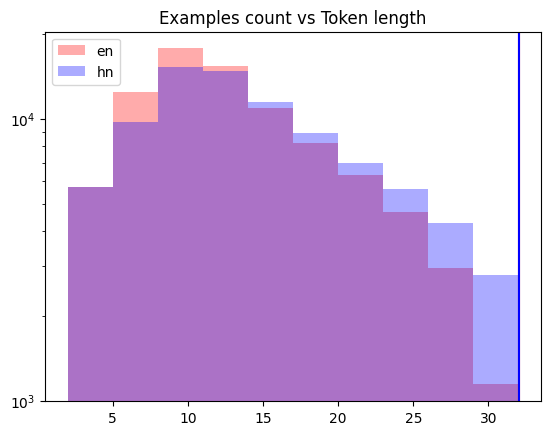

In [19]:
# histogram of sentence length in tokens
en_lengths = [len(e.split()) for e, h in train_iter]
hn_lengths = [len(h.split()) for e, h in train_iter]

plt.hist(en_lengths, label="en", color="red", alpha=0.33)
plt.hist(hn_lengths, label="hn", color="blue", alpha=0.33)
plt.yscale("log")     # sentence length fits Benford"s law
plt.ylim(plt.ylim())  # make y-axis consistent for both plots
plt.plot([max(en_lengths), max(en_lengths)], plt.ylim(), color="red")
plt.plot([max(hn_lengths), max(hn_lengths)], plt.ylim(), color="blue")
plt.legend()
plt.title("Examples count vs Token length")
plt.show()